# Milestone 1: Implement Non Negative Matrix Factorization from Scratch

## Module Imports

In [4]:
# Required module imports
import numpy as np
from IPython.display import HTML, display
import numpy.linalg as LA

## Helper Methods

Helper Methods are provided to:
* create a document matrix 
* print the output of the NMF in nice tables

In [5]:

def simple_document_processor(documents_list, words_to_remove = ['i', 'use', 'in', 'is', 'a', 'for']):
  """ Remove stop words, convert to lowercase and return both a Matrix with Document to Word counts and a Vocabularly for the dataset  """
  processed_docs = []
  for doc in documents_list:
    # make text document into a list of words
    words = doc.split(" ")
    # convert all words to lowercase
    words = [word.lower() for word in words]
    # remove all words that are provided in the words_to_remove list
    new_doc = [word for word in words if not word in words_to_remove]
    processed_docs.append(new_doc)

  # Make a list of unique words from all the documents (known as a vocabulary)
  vocab = [j for i in processed_docs for j in i]
  unique_vocab=list(set(vocab))

  # Replace each word in a document with its unique id from the vocabulary
  doc_vocabindex_list = []
  for doc in processed_docs:
    numeric_doc = [0] * len(unique_vocab)
    for word in doc:
      numeric_doc[unique_vocab.index(word)] = 1
    doc_vocabindex_list.append(numeric_doc)
  # Convert the list of word lists to a numpy Matrix
  doc_word_matrix = np.array(doc_vocabindex_list)

  # return the Matrix and Vocab list
  return (doc_word_matrix, unique_vocab)

def display_matrix_as_table(matrix, column_headers, row_headers, first_cell_text):
  """ Pretty print a Matrix as a table  """
  list_of_rows = matrix.tolist()
  html = "<table border='1' style='border-spacing:0px'>"
  html += "<tr>"
  html += "<td style='padding:5px'><h4>%s</h4></td>"%(first_cell_text)
  for header in column_headers:
    html += "<td style='padding:5px'><h4>%s</h4></td>"%(header)

  html += "</tr>"
  for rownum, row in enumerate(list_of_rows):
    html += "<tr>"
    html += "<td style='padding:5px'><h4>%s</h4></td>"%(row_headers[rownum])
    for field in row:
      html += "<td style='padding:5px;text-align:center'><h3>%.2f</h3></td>"%(field)
    html += "</tr>"

  html += "</table>" 
  html += "<br />" 
  display(HTML(html))     



## Convert a List of strings to a Document to Word Matrix




In [18]:
documents = [
             "I use statistics in Data Science",
             "I use linear algebra in Data Science",
             "I program in python",
             "Python is a great language to program with",
             'I use python for Data Science',
             "I program linear algebra in python"
]
words_to_remove = ['i', 'use', 'in', 'is', 'a', 'for', 'to', 'with']

doc_word_matrix, unique_vocab = simple_document_processor(documents, words_to_remove)

display_matrix_as_table(doc_word_matrix, unique_vocab, documents, 'Documents')

Documents,python,program,algebra,linear,statistics,data,great,language,science
I use statistics in Data Science,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00
I use linear algebra in Data Science,0.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00
I program in python,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Python is a great language to program with,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
I use python for Data Science,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
I program linear algebra in python,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00


## The NMF Class

Please complete the follwing steps in the code below:

* STEP 2: Initialise W and H with random values
* STEP 3: Implement the update rules for W and H
* STEP 4: Implement the perform_factorization() method
* STEP 5: Run NMF and review the resulting W and H matrices
* (CHALLENGE) STEP 7: Implement Early Stopping

In [ ]:
np.set_printoptions(suppress=True)

class NMF():

  def __init__(self, A, no_topics=2, **kwargs):
    '''
    
    '''

    self.A = A # input document-term matrix.
    self._no_topics = no_topics # no of topics that you define

    self._no_documents, self._no_words = self.A.shape #(m, n)

    self._epsilon = 2**-8 # ??
    self.W = None  # Initialize W to None
    self.H = None  # Initialize H to None

  def calc_reconstruction_error(self):
    """ Euclidean error between X and W*H using Frobenious norm """

    if self.H is not None and self.W is not None:
      error = LA.norm(self.A - np.dot(self.W, self.H)) # reconstruction error
    else:
      error = None

    return error

  def randomize_wh(self):
    """ Initalize W and H with random values between 0 and 1."""
    # Todo - STEP 2 -  Initialise W and H with random values
    self.W = np.random.random((self._no_documents, self._no_topics))
    self.H = np.random.random((self._no_topics, self._no_words))

  def update_h(self):
    # Todo - STEP 3: Implement the update rules for W and H
    # H = H .* (W'A) ./ (W'WH + epsilon)
    if self.W is not None and self.A is not None and self.H is not None:
      numerator = self.W.T @ self.A
      denominator = self.W.T @ self.W @ self.H
      self.H = self.H * (numerator / (denominator + self._epsilon))

  def update_w(self):
    # Todo - STEP 3: Implement the update rules for W and H
    # W = W .* (AH' ) ./ (WHH' + epsilon)
    if self.A is not None and self.H is not None and self.W is not None:
      numerator = self.A @ self.H.T
      denominator = self.W @ self.H @ self.H.T
      self.W = self.W * (numerator / (denominator + self._epsilon))

  def perform_factorization(self, max_iter=1000, tolerance=0.001):

    #Todo - STEP 4: Implement the perform_factorization() method
    self.randomize_wh()

    self.reconstruction_error = np.zeros(max_iter)
    self.reconstruction_error[0] = self.calc_reconstruction_error()
    previous_error = self.reconstruction_error[0]

    number_of_iterations = 0


    for i in range(1, max_iter):
      number_of_iterations = i

      self.update_h() # Call the function to update H
      self.update_w() # Call the function to update W

      self.reconstruction_error[i] = self.calc_reconstruction_error()
      if ((previous_error - self.reconstruction_error[i]) / self.reconstruction_error[0]) < tolerance:
        break
      previous_error = self.reconstruction_error[i]

    return (self.W, self.H, self.reconstruction_error, number_of_iterations)

max_iter = 100
nmf = NMF(doc_word_matrix, no_topics=2)
W, H, reconstruction_error, number_of_iterations = nmf.perform_factorization(max_iter)

display_matrix_as_table(W, ['Topic 1', 'Topic 2'], documents, 'Documents')

display_matrix_as_table(H, unique_vocab, ['Topic 1', 'Topic 2'], 'Topics')


--- Documents ---
          Topic 1   Topic 2   
doc_1     0.9971    0.1647    
doc_2     0.6331    0.3933    
doc_3     0.1250    0.6496    
doc_4     0.4588    0.8043    
doc_5     0.6421    0.0873    
doc_6     1.1734    0.2588    
doc_7     0.9648    0.0938    
doc_8     0.8801    0.4446    
doc_9     1.1462    0.0024    
doc_10    0.2628    0.8280    

--- Topics ---
          word_1    word_2    word_3    word_4    word_5    word_6    word_7    word_8    word_9    word_10   word_11   word_12   word_13   word_14   word_15   
Topic 1   2.8387    1.8932    1.9019    1.5984    0.0001    0.8322    1.2186    2.4081    2.4377    2.5808    2.6715    1.5793    2.3479    1.7867    0.2076    
Topic 2   1.8181    1.9916    0.9409    2.0007    3.2584    3.1419    1.2423    1.9712    0.3923    2.0816    0.0585    1.9340    0.0041    3.5051    4.7320    


## Plot the Reconstruction Error 

The code below implements:
 * STEP 5: Plot the reconstruction error]

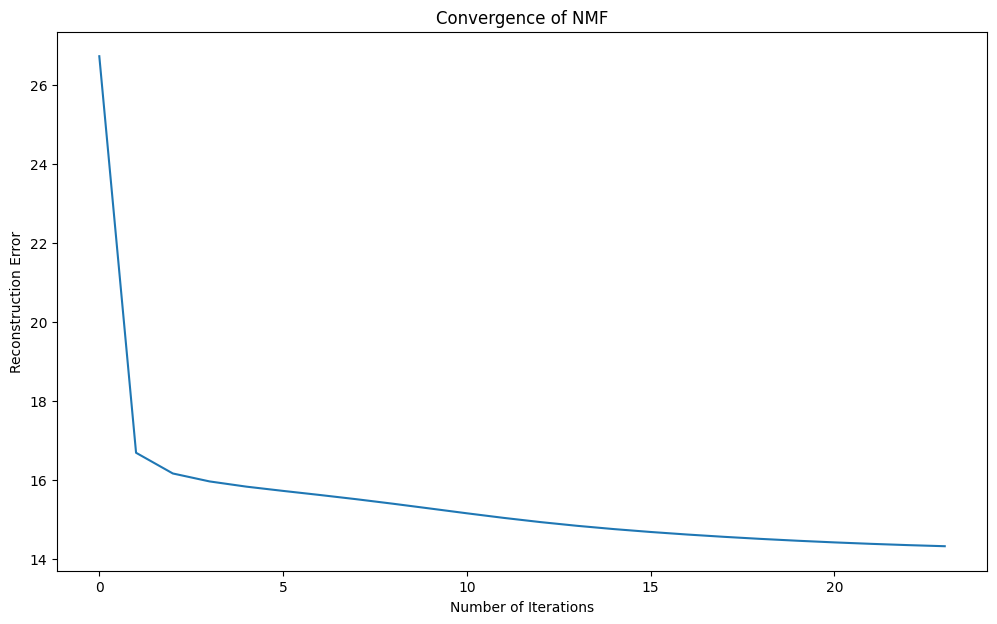

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,7))
plt.plot(range(number_of_iterations), reconstruction_error[0:number_of_iterations])  

plt.xlabel("Number of Iterations")
plt.ylabel("Reconstruction Error")
plt.title("Convergence of NMF")

plt.show()
